In [5]:
!pip install .

Processing /Users/tracyx/Desktop/Stat663-Final-Project/GBW


In [1]:
import GBW

In [2]:
import numpy as np
from scipy import stats
import scipy.io
from matplotlib import pyplot as plt
import time
import pstats

## Load synthesized data
Y = scipy.io.loadmat('Y.mat')['Y'] # Graph information of contacts each timestamp, dim=(84,84,107)
X = scipy.io.loadmat('X.mat')['X'] # Hidden(infection) states, dim=(84,108), including X(0)
G = scipy.io.loadmat('G.mat')['G'] # Observed(symptom) states, dim=(84,6,107)
C = scipy.io.loadmat('C.mat')['C']

sC = [np.sum(c[0], 1) for c in C]

In [3]:
[XBELEM, paraAEM] = GBW.AEMBP_GCHMM(G,Y,C, sC, 'f', 5, 0.0001,X)

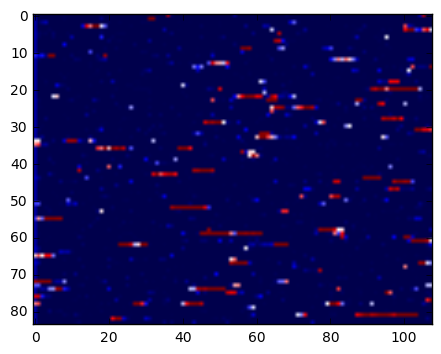

In [4]:
plt.imshow(XBELEM[:,1,:], cmap='seismic')
plt.savefig("predicted_AEM.png", dpi = 300, bbox_inches ="tight")
plt.show()

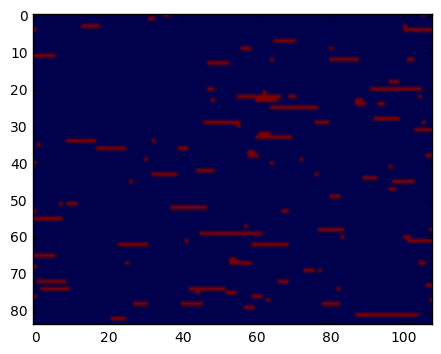

In [6]:
plt.imshow(X, cmap='seismic')
plt.savefig("true.png", dpi = 300, bbox_inches ="tight")
plt.show()

In [ ]:
def work(G,Y,C, sC, initial, MaxIter, tol,X):
     GBW.AEMBP_GCHMM(G,Y,C, sC, initial, MaxIter, tol,X)

In [ ]:
%prun -q -D GBW.AEMBP_GCHMM.prof  GBW.AEMBP_GCHMM(G, Y, C, sC,'f', 5, 0.0001, X)

In [ ]:
p = pstats.Stats('AEMBP_GCHMM.prof')
p.sort_stats('time','cumulative').print_stats(15)
pass